In [1]:
%matplotlib inline
import numpy as np
from numpy import random
import random
import math
import matplotlib.pyplot as plt
from operator import add
import nest


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.7.0
 Built: May 19 2024 15:53:53

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
import os
import sys
Path = os.getcwd()
sys.path.append(Path)
from utilities import *

## Signal-to-Noise Ratio 
Finding the minimum average SNR for signal containing only noise, to quantify the SNR necessary to produce a detectable signal 

In [7]:
def SNR(sim_times, a=0, sd=250, second_sine=False, f=10, weight=10,
             bin_size=0.25, log=False, beat=20, save_fig=False, seed=42, N=1, return_SNR=False):
    """Denne funksjonen regner ut SNR som funksjon av tid for beat-frekvensen"""

    plt.rcParams["font.family"] = "Liberation Serif"
    colors = ["#006D5B", "#89CFF0", "#FF6347", "#FFD700", "#4682B4", "#2E8B57", "#D2691E", "#8B008B", "#708090"]
    colors = ["#006D5B", "#B22222", "steelblue", "#FFD700", "#4682B4", "#2E8B57", "#D2691E", "#8B008B", "#708090"]
    
    SNR_max = []
    for k in range(N):
        if k%20 == 0:
            print(f"{k/N*100}% completed ")
      
            
        seed = np.random.randint(0,1e6)
        
    
        results = build_simulation(sim_time=np.max(sim_times), noisy=True, second_sine=second_sine, f1=f, a=a, SD=sd, seed=seed, resolution=0.25)
                
        spike_times = results["spike_times"]
     
        SNR_list = []
        sim_times_valid = []
        SNR_lists = []
        

        
        noise_window = 5

        for i,t in enumerate(sim_times):
            
            
            freqs, psd_values = psd(spike_times[spike_times <= t], t, bin_size=bin_size)
            psd_index = np.argmin(np.abs(freqs-beat)) #finner indeksen nærmest f
                
            noise_mask = (freqs >= (freqs[psd_index]  - noise_window)) & (freqs <= (freqs[psd_index] + noise_window)) & (freqs != freqs[psd_index])
            local_noise = psd_values[noise_mask]
            noise_avg = np.mean(local_noise)
            
            if noise_avg > 0:
                SNR = ((psd_values[psd_index]) / noise_avg)
                
                SNR_list.append(SNR)
                sim_times_valid.append(t)
                
            else:
                SNR = np.nan
                print (SNR)
            
        SNR_lists.append(SNR_list)
            # Plotting last list of SNR only 
        if k % N == 0:
                
            #for i,a in enumerate(a_values):
            plt.plot(np.array(sim_times_valid)/1000, SNR_list, label=f"$\Delta f$ = {beat}Hz)", color=colors[0], alpha=0.6)
            #plt.plot(sim_times/1000, SNR_list_2, label=f"f1={f}, f2={f-beat}", color=colors[0], alpha=0.6)
            plt.title(rf"SNR vs. simulation time ($I_{{\mathrm{{amp}}}}$ = {a} pA, f1={f}Hz, f2={f+beat}Hz)", fontsize=16, color="#006D5B")
            plt.xlabel("Time [s]", fontsize=16)
            plt.ylabel("SNR", fontsize=16)
            
            if log:
                ax.set_xscale("log")
                ax.set_yscale("log")
            print(f"a={a}pA, f={f}Hz, SNR={SNR:.2f}")
            ax = plt.gca()
            ax.set_facecolor("#F5F5F5")
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.spines["left"].set_color("#333333")
            ax.spines["bottom"].set_color("#333333")
            ax.xaxis.label.set_color("#006D5B")
            ax.yaxis.label.set_color("#006D5B")
            ax.tick_params(axis='both', colors="#333333", labelsize='large' )
            ax.grid(color='#B0B0B0', linestyle='-', linewidth=0.5)
            ax.legend(facecolor="white", framealpha=1, edgecolor="#333333")
    
        SNR_max.append(SNR)
    
    if save_fig:
        save_dir = os.path.join(os.getcwd(), "results")
        os.makedirs(save_dir, exist_ok=True)
        file_index = 1
        while os.path.exists(os.path.join(save_dir, f"SNR_beat{file_index}.png")):
            file_index += 1
            
        save_path = os.path.join(save_dir, f"SNR_beat{file_index}.png")
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
        
    plt.tight_layout()
    plt.show()
    
    if N >= 10:
        plt.figure()
        plt.hist(SNR_max, bins=10, density=True, color="teal", alpha=0.6, edgecolor='black')
        
        ax = plt.gca()
        ax.set_facecolor("#F5F5F5")
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_color("#333333")
        ax.spines["bottom"].set_color("#333333")
        ax.xaxis.label.set_color("#006D5B")
        ax.yaxis.label.set_color("#006D5B")
        ax.tick_params(axis='both', colors="#333333")
        ax.legend(facecolor="white", framealpha=1, edgecolor="#333333")
        plt.tight_layout()
        save_figure("hist-beat")
        plt.show()
        
  
    if return_SNR:
        return SNR_max
    

0.0% completed 
a=0pA, f=1000Hz, SNR=0.81


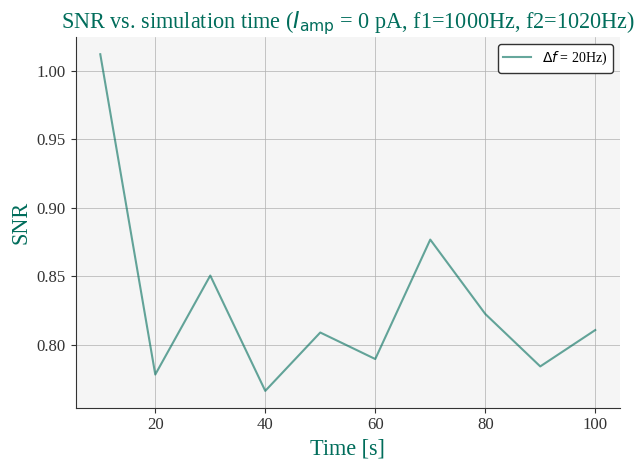

In [8]:
snr = SNR(a=0,sim_times=np.linspace(10e3,100e3,10), beat=20, f=1000, save_fig=True, N=1, return_SNR=True)

0.0% completed 
a=1000pA, f=1000Hz, SNR=2.57
40.0% completed 
80.0% completed 


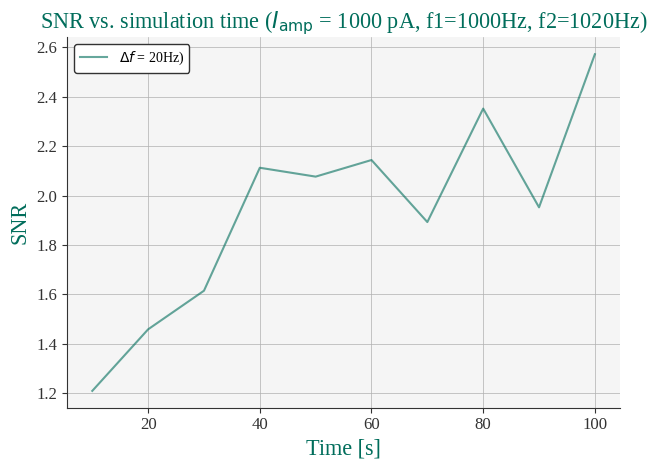

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Saved plot as: /mnt/user/shared/Tonjes_CompNeuro/comp_neuro_course/master/notebooks/results/hist-beat.png


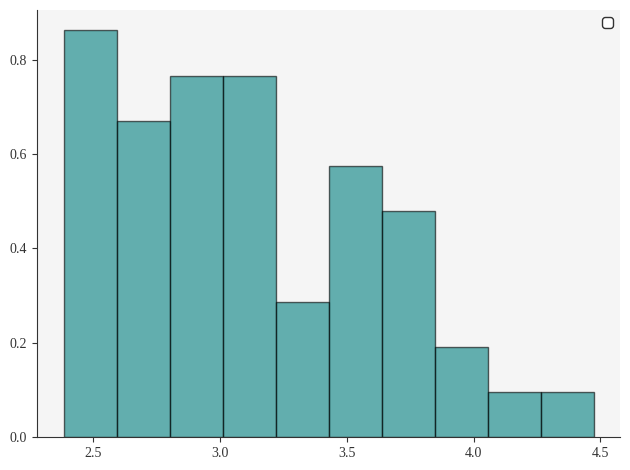

In [13]:
snr = SNR(a=1000,second_sine=True,sim_times=np.linspace(10e3,100e3,10), beat=20, f=1000, save_fig=True, N=50, return_SNR=True)

0.0% completed 
a=0pA, f=20Hz, SNR=0.81
20.0% completed 
40.0% completed 
60.0% completed 
80.0% completed 


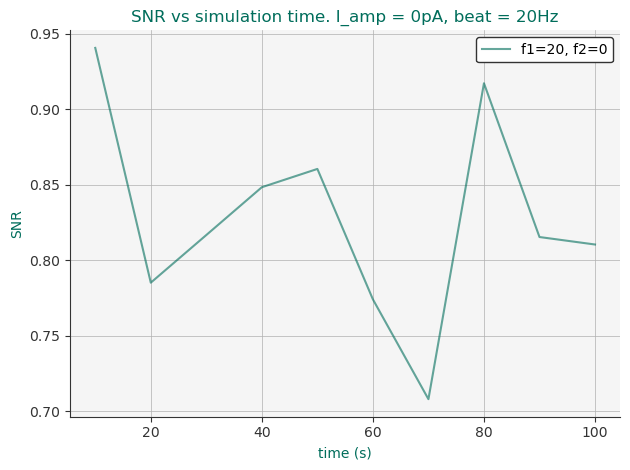

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


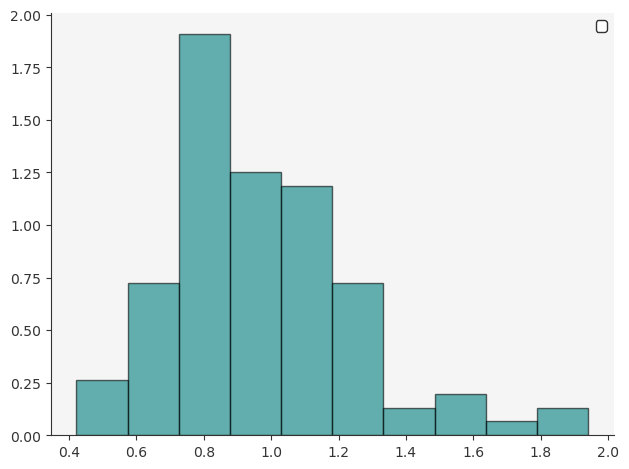

In [13]:
"""f = beat = 20 Hz"""

snr = SNR(a=0,sim_times=np.linspace(10e3,100e3,10), beat=20, f=20, save_fig=False, N=100, return_SNR=True)

In [14]:
print(f"mean:{np.nanmean(snr)}")
print(f"std:{np.std(snr)}")

mean:0.978850851777181
std:0.27905484555144805


In [4]:
def SNR_amp(sim_time, a_values, sd=250, noise_window=5, second_sine=False, f_values=[10,20], bin_size=0.25, resolution=0.25):
    
    colors = ["seagreen", "mediumaquamarine", "cornflowerblue","gold", "magenta" ]
    for i, f in enumerate(f_values):
        SNR_list = []
        for j, a in enumerate(a_values): 
            
            results = build_simulation(sim_time=sim_time, noisy=True, second_sine=second_sine, resolution=0.25,
                                        f1=f, a=a, SD=sd, seed=42)
                    
            spike_times = results["spike_times"]
            
            results_noise = build_simulation(sim_time=sim_time, noisy=True, resolution=resolution,
                                    f1=f, a=0, SD=sd, second_sine=False, seed=42)
            
    
            spike_times_noise = results_noise["spike_times"]
            freqs, psd_values = psd(spike_times, sim_time, bin_size=bin_size)
            psd_index = np.argmin(np.abs(freqs-f)) #finner indeksen nærmest f
                
            freqs_noise, psd_values_noise = psd(spike_times_noise, sim_time, bin_size=bin_size)
            noise_mask = (freqs_noise >= (freqs_noise[psd_index] - noise_window)) & (freqs_noise <= (freqs_noise[psd_index] + noise_window))
            local_noise = psd_values_noise[noise_mask]
            noise_avg = np.mean(np.abs(local_noise))
            
            if noise_avg > 0:
                SNR = (np.abs(psd_values[psd_index]) / noise_avg)
                

                
            else:
                SNR = np.nan
                print (SNR)
            
            
            SNR_list.append(SNR)
            
        plt.plot(a_values, SNR_list, label=f"f={f}Hz", color=colors[i])
        plt.title(f"B. SNR vs Current Amplitude", 
                  fontsize=20, fontweight='bold', color="#006D5B")
        plt.xlabel(r"$I_{\mathrm{amp}}$ [pA]", fontsize=16)
        plt.ylabel("SNR", fontsize=16)
        plt.legend()
        
        ax = plt.gca()
        ax.set_facecolor("#F5F5F5")
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_color("#333333")
        ax.spines["bottom"].set_color("#333333")
        ax.xaxis.label.set_color("#006D5B")
        ax.yaxis.label.set_color("#006D5B")
        ax.tick_params(axis='both', colors="#333333", labelsize='large')
        ax.grid(color='#B0B0B0', linestyle='-', linewidth=0.5)
        ax.legend(facecolor="white", framealpha=1, edgecolor="#333333", fontsize=16)
        plt.tight_layout()
        ax.set_xscale("log")
        ax.set_yscale("log")
    
        
    save_figure("SNR_vs_Iamp")       
    plt.tight_layout()
    plt.show()
    

Saved plot as: /mnt/user/shared/Tonjes_CompNeuro/comp_neuro_course/master/notebooks/results/SNR_vs_Iamp.png


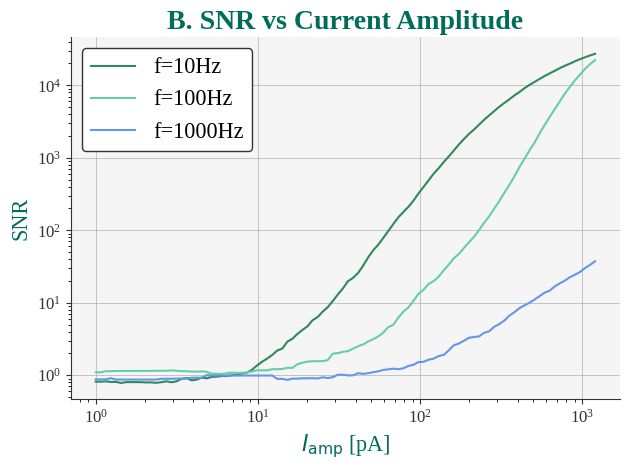

In [9]:
SNR_amp(sim_time=100e3, a_values=np.logspace(np.log10(1), np.log10(1200), 100), sd=250, second_sine=False, f_values=[10,100,1000], bin_size=0.25, resolution=0.25)

## SNR vs. frequency 

In [7]:
def SNR_f(sim_time, a_values, sd=250, noise_window=5, second_sine=False, f_values=[10,20], bin_size=1, beat=2, save_fig=False):

    colors = ["#009879", "teal", "#4CAF50", "#8BC34A", "#CDDC39", "#FFEB3B"]
    for i, a in enumerate(a_values):
        SNR_list = []
       
        for j, f in enumerate(f_values): 
            
            results = build_simulation(sim_time=sim_time, noisy=True, resolution=0.25,
                                        f1=f, a=a, SD=sd, seed=42, second_sine=second_sine, beat=beat)
            
            results_noise = build_simulation(sim_time=sim_time, noisy=True, resolution=0.25,
                                    f1=np.min(f_values), a=0, SD=sd, second_sine=second_sine, seed=42, beat=beat)        
            spike_times = results["spike_times"]
                
            spike_times_noise = results_noise["spike_times"]
                
            freqs, fft_values = psd(spike_times, sim_time, bin_size=bin_size)
            
            fft_index = np.argmin(np.abs(freqs-f)) #finner indeksen nærmest 12 Hz
            
            freqs_noise, psd_values_noise = psd(spike_times_noise, sim_time, bin_size=bin_size)
            noise_mask = (freqs_noise >= (f - noise_window)) & (freqs_noise <= (f + noise_window))
            local_noise = psd_values_noise[noise_mask]
            noise_avg = np.mean(np.abs(local_noise))

            noise_avg = np.mean(np.abs(psd_values_noise))
            #print(np.abs(fft_values[fft_index]))
            
            if noise_avg > 0:
                SNR = (np.abs(fft_values[fft_index]) / noise_avg)
            else:
                SNR = np.nan
            
            SNR_list.append(SNR)
            
        all_SNR_values = dict(zip(f_values, SNR_list))
        all_SNR_10Hz = SNR_list[np.argmin(np.abs(np.array(f_values) - 10))]
        arg_close_to_10Hz = np.argmin(np.abs(np.array(f_values) - 10))                                      
        
        # Plot
        plt.rcParams["font.family"] = "Liberation Serif"
        plt.plot(f_values, SNR_list, color=colors[i], label=rf"$I_\mathrm{{amp}} = {a}\,\mathrm{{pA}}$")
        plt.title(rf"A. SNR vs frequency", fontweight='bold', color="#006D5B", fontsize=20)
        plt.xlabel("Frequency [Hz]", fontsize=16)
        plt.ylabel("SNR", fontsize=16)
        plt.legend()
         #generated by chatGPT
        ax = plt.gca() 
        ax.set_facecolor("#F5F5F5")
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_color("#333333")
        ax.spines["bottom"].set_color("#333333")
        ax.xaxis.label.set_color("#006D5B")
        ax.yaxis.label.set_color("#006D5B")
        ax.tick_params(axis='both', colors="#333333", labelsize='large')
        ax.grid(color='#B0B0B0', linestyle='-', linewidth=0.5)
        ax.legend(facecolor="white", framealpha=1, edgecolor="#333333")
        ax.set_yscale("log")
        ax.set_xscale("log")
        
    if save_fig:
        save_dir = os.path.join(os.getcwd(), "results")
        os.makedirs(save_dir, exist_ok=True)
        file_index = 1
        while os.path.exists(os.path.join(save_dir, f"SNR_f_{file_index}.png")):
            file_index += 1
        
        save_path = os.path.join(save_dir, f"SNR_f_{file_index}.png")
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
    
        
        print(f"Saved plot as: {save_path}")
            
    plt.tight_layout()
    plt.show()
    return SNR_list
    

SNR ved f=10.0 for a=100pA: 346.59
SNR ved f=10.0 for a=500pA: 10904.84
SNR ved f=10.0 for a=1000pA: 23591.90
Saved plot as: /mnt/user/shared/Tonjes_CompNeuro/comp_neuro_course/master/notebooks/results/SNR_f_1.png


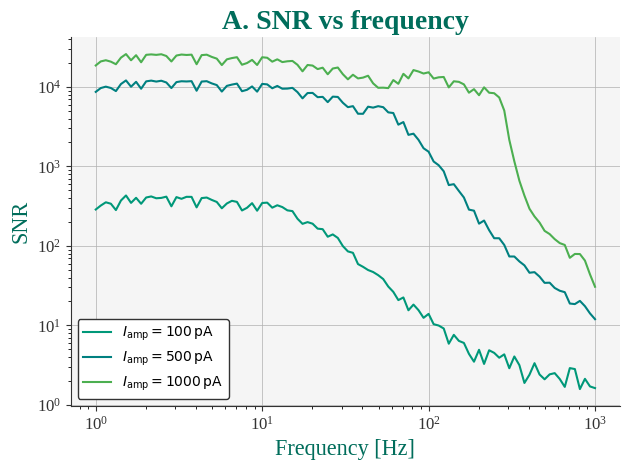

In [8]:
snr = SNR_f(sim_time=100e3, a_values=[100, 500, 1000], sd=250, second_sine=False, f_values=np.logspace(np.log10(1), np.log10(1000), 100), bin_size=0.25, save_fig=True)